In [1]:
import torch
import matplotlib.pyplot as plt
from dataloader import MRIDataset
from residual3dunet.model import ResidualUNet3D
from torch.utils.data import Dataset, DataLoader
from utils import dice_coefficient, iou, plotloss, plotaccuracy
import torchvision.transforms as T
import re

<Figure size 432x288 with 0 Axes>

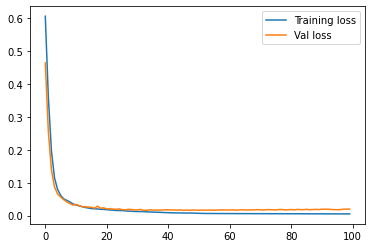

<Figure size 432x288 with 0 Axes>

In [2]:
plotloss('output/train10.out')
plt.figure()
# plotaccuracy('output/train6.out')


In [4]:
device = torch.device('cpu')
model = ResidualUNet3D(in_channels=1, out_channels=1, testing=True).to(device)

# model = torch.nn.DataParallel(model)
model.load_state_dict(torch.load("model/model10.pt", map_location=device))

<All keys matched successfully>

In [5]:
testdataset = MRIDataset(train=False, transform=T.ToTensor())
test_loader = DataLoader(dataset = testdataset, batch_size=1, shuffle=False)

In [6]:
model.eval()

dataiter = iter(test_loader)
data = dataiter.next()
# data = dataiter.next()
# data = dataiter.next()
features, labels = data

features, labels = features.float().to(device), labels.float().to(device)

output = model(features)

torch.Size([1, 32, 14, 240, 240])
torch.Size([1, 64, 14, 120, 120])
torch.Size([1, 128, 14, 60, 60])
torch.Size([1, 256, 14, 30, 30])
torch.Size([1, 512, 14, 15, 15])
torch.Size([1, 256, 14, 30, 30])
torch.Size([1, 128, 14, 60, 60])
torch.Size([1, 64, 14, 120, 120])
torch.Size([1, 32, 14, 240, 240])
torch.Size([1, 1, 14, 240, 240])


In [7]:
# preds = torch.sigmoid(output)
preds = (output > 0.5).float()

print(preds.shape)
batch, channel, depth, width, height = preds.shape

print(dice_coefficient(preds, labels))
print(iou(preds, labels))

torch.Size([1, 1, 14, 240, 240])
tensor(0.9073)
tensor(0.8303)


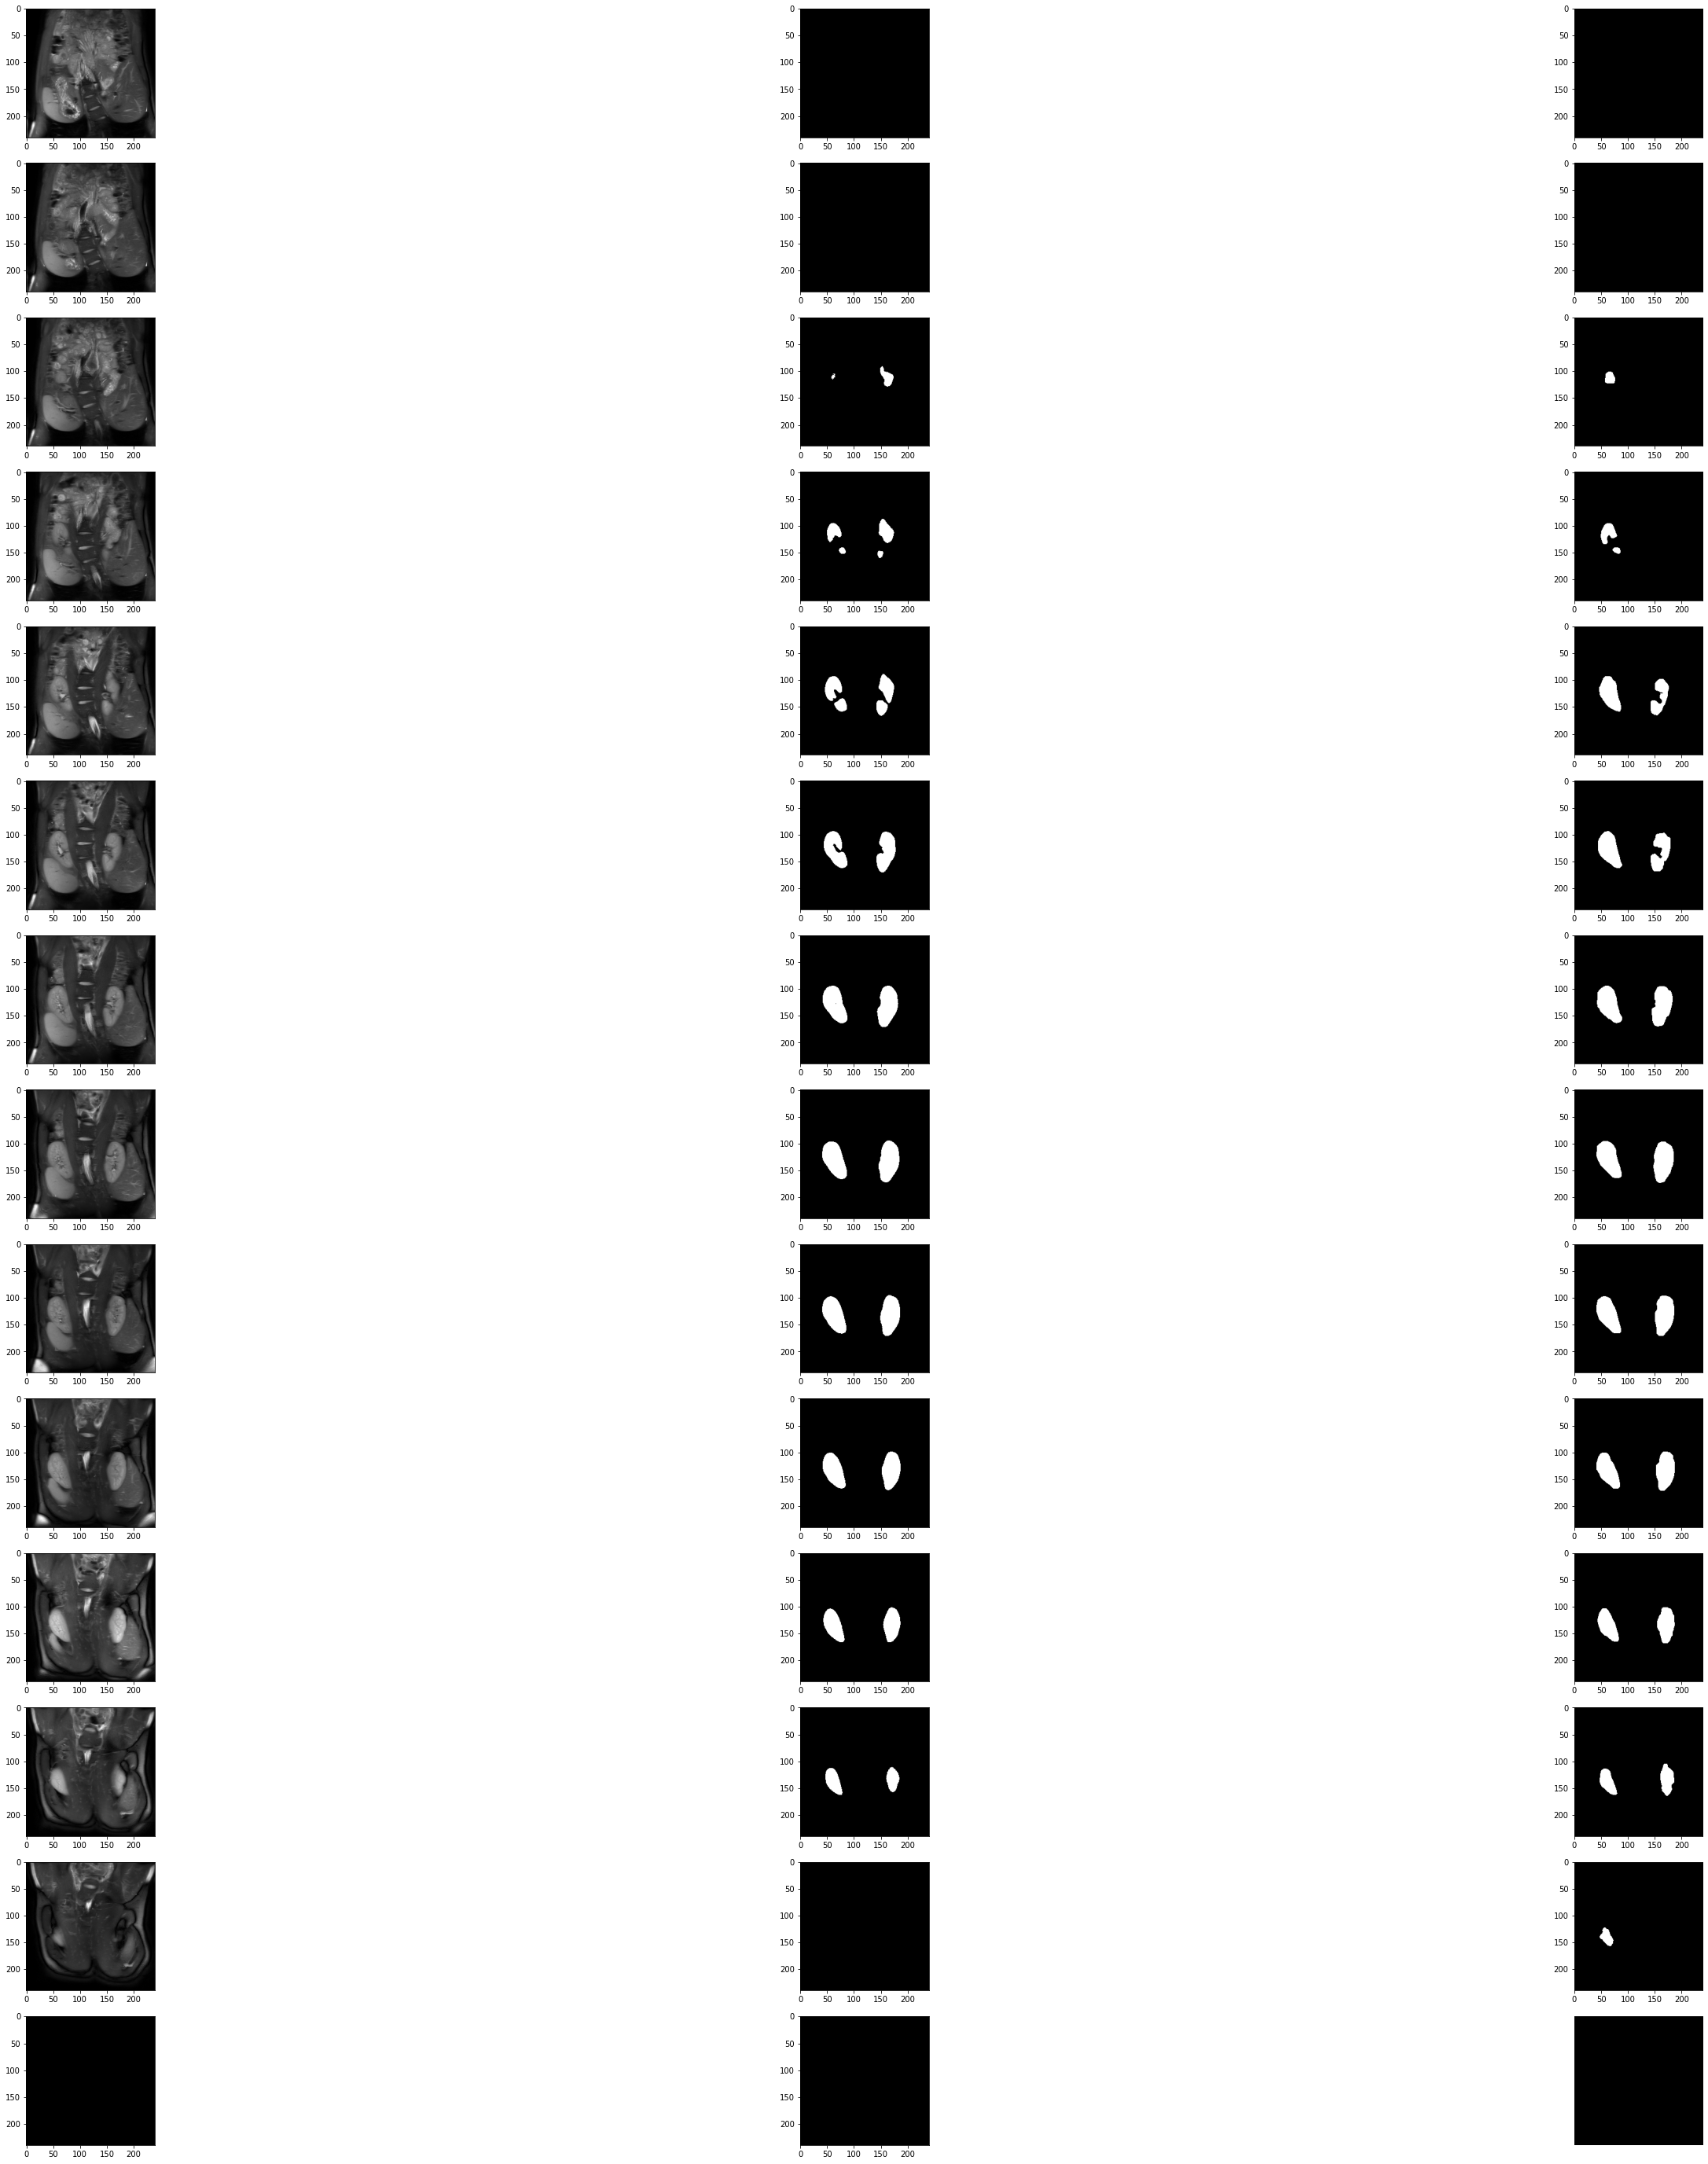

In [8]:
# Visualize Single Image Data
f, axarr = plt.subplots(14,3,figsize=(50,50))

for i in range(depth):
    axarr[i,0].imshow(features[0,0,i,:,:],cmap='gray')
    axarr[i,1].imshow(preds[0,0,i,:,:],cmap='gray')
    axarr[i,2].imshow(labels[0,0,i,:,:],cmap='gray')
    plt.axis('off')